In [16]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [17]:
model = keras.models.load_model('cnn_model.keras')

In [18]:
model.layers

[<Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_8, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Flatten name=flatten_4, built=True>,
 <Dense name=dense_8, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_9, built=True>]

In [19]:
# 0번째 input
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_4>

In [20]:
# 0번째 output
model.layers[0].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor_72>

In [21]:
# keras.models.Model 넣어서 결과 확인
# model 새롭게 구성
conv_acti = keras.models.Model(model.layers[0].input,model.layers[0].output)

In [23]:
# 데이터를 1개 뽑아서, 위 model에 넣어서 확인
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [24]:
model.layers[0]


<Conv2D name=conv2d_8, built=True>

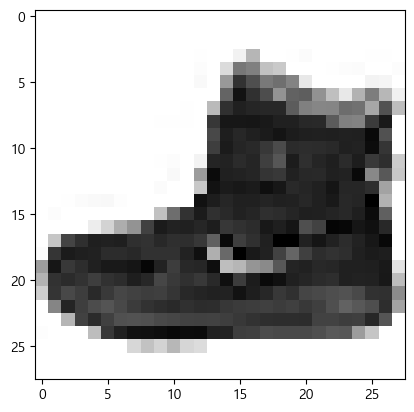

In [25]:
# train_input[0] 확인
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [26]:
# train_input[0] 데이터를 위 model로 예측
# 2차원 행렬에서 3차원 행렬로 변경 / 255
inputs = train_input[0:1].reshape(-1,28,28,1) / 255

# 1개를 예측, 임시model(conv_acti)에서 predict
feature_maps = conv_acti.predict(inputs) # conv2D 모델만 존재

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [28]:
# 32개의 필터 활성화 맵이 구성.
feature_maps.shape

(1, 28, 28, 32)

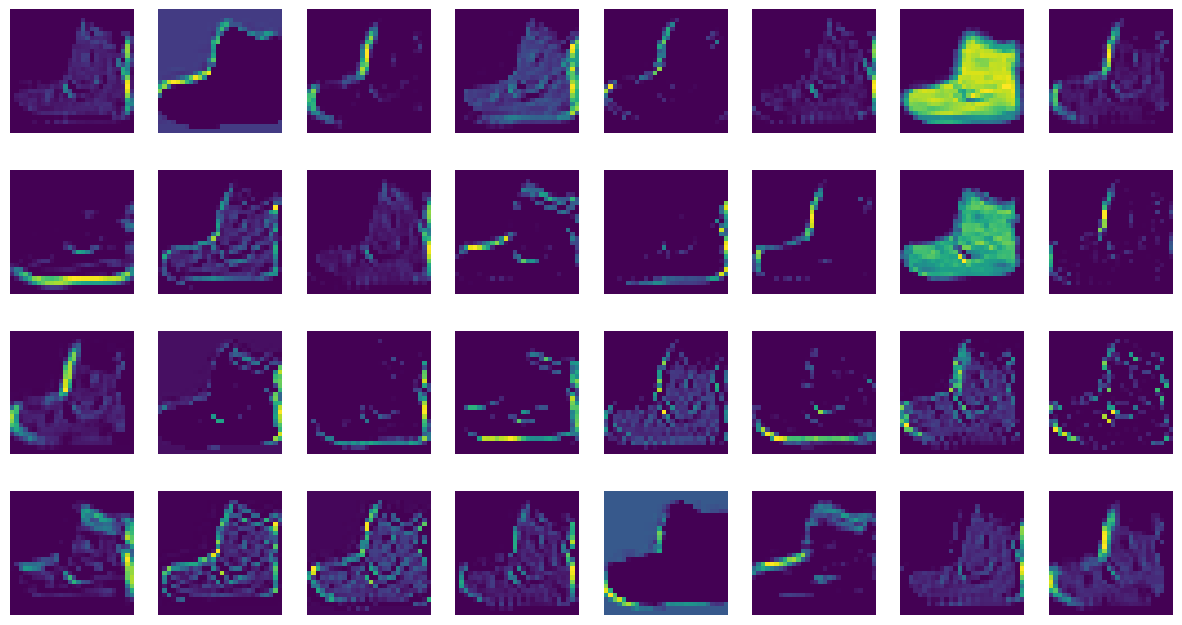

In [29]:
# 그래프 출력 - 활성화맵(가중치 결과) 32장의 이미지 출력
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        # axs = [0,0],[0,1],[0,2] .... [1,6],[1,7]
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])  # 0,1,2,3,4,5,6,..... 30,31
        axs[i,j].axis('off')
plt.show()
